In [48]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
# preprocessing
import re
import string
import nltk
from nltk import  pos_tag
from nltk.corpus import stopwords
import nltk.stem as stemmer

from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec


from collections import Counter
# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report



In [2]:
#read data
dataset= pd.read_csv('liar.csv')
dataset

,label,speaker,speaker's job title,state info,party affiliation,the context,news
0,1,0,0,-1,0,0,veteransIts been nearly three weeks since the ...
1,1,1,-1,0,1,1,educationWe have about six school districts th...
2,1,2,-1,-1,1,2,"crime immigration134,000 (criminal) aliens hav..."
3,1,3,1,1,1,3,elections immigration message-machine-2012Says...
4,0,4,2,2,1,4,electionsSays Jeb Bush said he would take his ...
...,...,...,...,...,...,...,...
9995,0,1208,528,10,1,9,energy message-machineJoe Garcia raised utilit...
9996,0,143,84,-1,0,1744,federal-budget health-care medicare abc-news-w...
9997,0,2836,-1,-1,5,30,state-budget state-finances transportationThan...
9998,0,2099,882,29,0,552,religionSays a Portland school gives Muslim st...


In [3]:
print((dataset.label == 1).sum()) # real news number
print((dataset.label == 0).sum()) # fake news number

5638
4362


In [4]:
df= dataset[['news']]
label= dataset[['label']]
other_features= dataset.drop(['news', 'label'], axis= 1)
df.head(3)

,news
0,veteransIts been nearly three weeks since the ...
1,educationWe have about six school districts th...
2,"crime immigration134,000 (criminal) aliens hav..."


In [ ]:
# cleanning dataset

In [5]:
def remove_URL(text):
  url= re.compile(r'https?://\S+|www\.|S+')
  return url.sub(r"", text)

In [6]:
def remove_punctuation(text):
  trnsltr= str.maketrans("","", string.punctuation)
  return text.translate(trnsltr)

In [7]:
df['news']= df.news.map(remove_punctuation)
df['news']= df.news.map(remove_URL)

<ipython-input-7-a35a6abdf14c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news']= df.news.map(remove_punctuation)
<ipython-input-7-a35a6abdf14c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news']= df.news.map(remove_URL)


In [ ]:
#remove stop words

In [8]:
nltk.download('stopwords')
stop= set(stopwords.words("english"))
def remove_stopwords(text):
  result= [word.lower() for word in text.split() if word.lower() not in stop]
  return ' '.join(result)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df['news']= df.news.map(remove_stopwords)

<ipython-input-9-b1b16693267d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news']= df.news.map(remove_stopwords)


In [10]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()

pos= pos_tag(df['news'])
df['news'] = [stemmer.stem(tagged_word[0]) for tagged_word in pos]



<ipython-input-11-75a18c877c3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news'] = [stemmer.stem(tagged_word[0]) for tagged_word in pos]


In [12]:
df

,news
0,veteransits nearly three weeks since president...
1,educationwe six school districts school 140 15...
2,crime immigration134000 criminal aliens releas...
3,elections immigration messagemachine2012ays ne...
4,electionsays jeb bush said would take pants mo...
...,...
9995,energy messagemachinejoe garcia raised utility...
9996,federalbudget healthcare medicare abcnewsweeka...
9997,statebudget statefinances transportationthanks...
9998,religionays portland school gives muslim stude...


In [13]:
# counting unique words of news column
def count_words(text_col):
  counter= Counter()
  for text in text_col:
    for word in text.split():
      counter[word] += 1
  return counter


In [14]:
counter= count_words(df['news'])

In [15]:
# number of unique words
len(counter)

18213

In [16]:
unique_words_num= len(counter)

In [17]:
embedding_dim= 100

In [ ]:
# Word2Vec

In [18]:
X= [x.split() for x in df['news'].tolist()]

In [19]:
print(X[0])

['veteransits', 'nearly', 'three', 'weeks', 'since', 'president', 'commented', 'questions', 'possible', 'hidden', 'wait', 'lists', 'veterans', 'hospit']


In [20]:
w2v_mdl= Word2Vec(sentences= X, window= 10, min_count=1 )

In [21]:
len(w2v_mdl.wv.index_to_key)

18213

In [ ]:
# most similarity of 5 most common words

In [22]:
print(most_common:= counter.most_common(5))

[('economy', 1036), ('percent', 998), ('tax', 745), ('year', 739), ('jobs', 707)]


In [23]:
print('word is: ',wrd:= most_common[0][0])
w2v_mdl.wv.most_similar(wrd)

word is:  economy


[('jobaccomplishments', 0.9995083808898926),
 ('jobs', 0.9993886947631836),
 ('corporations', 0.9991641044616699),
 ('poverty', 0.9988983273506165),
 ('labor', 0.9988031387329102),
 ('governmentefficiency', 0.998790442943573),
 ('lost', 0.9987818598747253),
 ('weve', 0.9986720681190491),
 ('jobsthe', 0.9986433982849121),
 ('created', 0.9985685348510742)]

In [ ]:
print('word is: ',wrd:= most_common[1][0])
w2v_mdl.wv.most_similar(wrd)

word is:  percent


[('50', 0.999713659286499),
 ('per', 0.9996345639228821),
 ('20', 0.9996093511581421),
 ('average', 0.999586820602417),
 ('less', 0.9995606541633606),
 ('perc', 0.9995264410972595),
 ('25', 0.9995084404945374),
 ('almost', 0.9995012879371643),
 ('10', 0.9994626641273499),
 ('15', 0.9994621872901917)]

In [ ]:
print('word is: ',wrd:= most_common[2][0])
w2v_mdl.wv.most_similar(wrd)

word is:  tax


[('taxes', 0.9996284246444702),
 ('property', 0.9993863105773926),
 ('cuts', 0.9992422461509705),
 ('sales', 0.9991356134414673),
 ('pay', 0.9991346001625061),
 ('cut', 0.9990787506103516),
 ('increase', 0.9989890456199646),
 ('spending', 0.9988909363746643),
 ('raising', 0.9988863468170166),
 ('billion', 0.9988747835159302)]

In [ ]:
print('word is: ',wrd:= most_common[3][0])
w2v_mdl.wv.most_similar(wrd)

word is:  year


[('10', 0.9997023344039917),
 ('25', 0.9995036721229553),
 ('percent', 0.9994322657585144),
 ('per', 0.9994140863418579),
 ('50', 0.9993869066238403),
 ('years', 0.9993715286254883),
 ('less', 0.9993689656257629),
 ('average', 0.9993591904640198),
 ('3', 0.9993425607681274),
 ('next', 0.9993128776550293)]

In [ ]:
print('word is: ',wrd:= most_common[4][0])
w2v_mdl.wv.most_similar(wrd)

word is:  jobs


[('economy', 0.999290406703949),
 ('created', 0.99923175573349),
 ('jobaccomplishments', 0.9990849494934082),
 ('poverty', 0.9986536502838135),
 ('labor', 0.9984905123710632),
 ('lost', 0.9984301924705505),
 ('corporations', 0.9984152317047119),
 ('unemployment', 0.9982870817184448),
 ('job', 0.998195230960846),
 ('growth', 0.998171329498291)]

In [24]:
# vectorize a text into a sequence of integers by tokenizing
# converting text into a sequence of integers
def tokenize(text):
  tokenizer= Tokenizer(num_words= unique_words_num)
  tokenizer.fit_on_texts(text)
  return tokenizer

In [25]:
tokenizer= tokenize(X)


In [26]:
print(word_index:= tokenizer.word_index)

{'economy': 1, 'percent': 2, 'tax': 3, 'year': 4, 'jobs': 5, 'state': 6, 'healthcare': 7, 'obama': 8, 'health': 9, 'people': 10, 'would': 11, 'education': 12, 'million': 13, 'federalbudget': 14, 'president': 15, 'crime': 16, 'care': 17, 'new': 18, 'candidatesbiography': 19, 'years': 20, 'one': 21, 'billion': 22, 'taxes': 23, 'u': 24, 'said': 25, 'history': 26, 'federal': 27, 'statebudget': 28, 'congress': 29, 'foreignpolicy': 30, 'budget': 31, 'voted': 32, 'energy': 33, 'bill': 34, 'every': 35, 'elections': 36, 'law': 37, 'children': 38, 'united': 39, 'texas': 40, 'income': 41, 'deficit': 42, 'debt': 43, 'barack': 44, 'government': 45, 'pay': 46, 'last': 47, 'states': 48, 'cut': 49, 'money': 50, 'plan': 51, 'job': 52, 'since': 53, 'clinton': 54, 'rate': 55, 'immigration': 56, 'school': 57, 'first': 58, 'abortion': 59, 'tates': 60, '1': 61, 'medicare': 62, 'republican': 63, 'get': 64, 'florida': 65, 'military': 66, 'even': 67, 'american': 68, 'wisconsin': 69, 'public': 70, 'country': 71

In [27]:
tokenizer.word_counts

OrderedDict([('veteransits', 1),
             ('nearly', 141),
             ('three', 154),
             ('weeks', 30),
             ('since', 250),
             ('president', 473),
             ('commented', 1),
             ('questions', 9),
             ('possible', 15),
             ('hidden', 6),
             ('wait', 7),
             ('lists', 3),
             ('veterans', 60),
             ('hospit', 5),
             ('educationwe', 14),
             ('six', 75),
             ('school', 241),
             ('districts', 27),
             ('140', 5),
             ('150', 21),
             ('days', 64),
             ('year', 739),
             ('crime', 449),
             ('immigration134000', 1),
             ('criminal', 35),
             ('aliens', 15),
             ('released', 25),
             ('obama', 610),
             ('administration', 121),
             ('past', 93),
             ('two', 161),
             ('elections', 308),
             ('immigration', 242),
         

In [28]:
text_sentences= df['news'].to_numpy()
text_sequences= tokenizer.texts_to_sequences(X)


In [29]:
print(text_sentences[100])
print(text_sequences[100])

taxesays mitt romney belittled middleclass tax cuts nothing little bandaid
[73, 220, 142, 8450, 1229, 3, 151, 521, 673, 8451]


In [ ]:
#reversing tokenization
# test_sequences

In [30]:
# min and max lengh of train sequences
train_min_lenght= len(min(text_sequences, key= len))
train_max_lenght= len(max(text_sequences, key= len))
train_min_lenght , train_max_lenght


(2, 319)

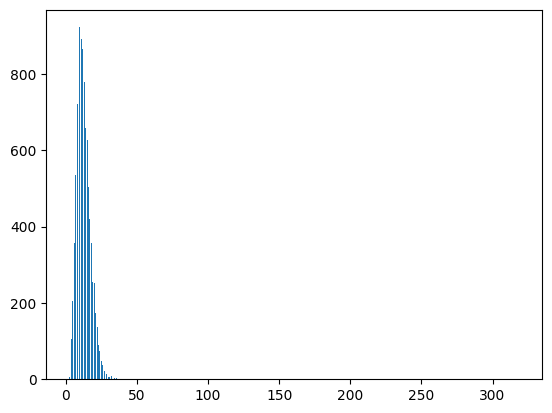

In [31]:
# plotting len of each sentence
plt.hist([len(x) for x in X], bins=500);

In [32]:
sentence_len= np.array([len(x) for x in X])
print(f'There are {len(sentence_len[sentence_len > 25])} sentences which have more than 25 words.')
max_len= 25

There are 138 sentences which have more than 25 words.


In [33]:
# padding
def padding_sequences(seq, max_len):
  return pad_sequences(seq, maxlen= max_len, padding= "post", truncating="post")

In [34]:
text_padded= padding_sequences(text_sequences, max_len)

In [35]:
print(text_sentences[100])
print(text_sequences[100])
print(text_padded[100])

taxesays mitt romney belittled middleclass tax cuts nothing little bandaid
[73, 220, 142, 8450, 1229, 3, 151, 521, 673, 8451]
[  73  220  142 8450 1229    3  151  521  673 8451    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


In [36]:
# checking tokenization by reversing from sequences to sentences
# filp word_index dictionay index and value
reversed_index= dict([(idx, word) for (word, idx) in word_index.items()])

In [37]:
def decode(seq):
  result= " ".join([reversed_index.get(idx, "?") for idx in seq])
  return result

In [38]:
decoded_news= decode(text_sequences[100])
print(text_sequences[100])
print(text_sentences[100])
print(decoded_news)

[73, 220, 142, 8450, 1229, 3, 151, 521, 673, 8451]
taxesays mitt romney belittled middleclass tax cuts nothing little bandaid
taxesays mitt romney belittled middleclass tax cuts nothing little bandaid


In [39]:
#concatinating other features to tokenized data

In [40]:
full_df_padded= np.hstack([text_padded, other_features])
max_len+= len(other_features.columns)


In [41]:
# vocab_size
vocab_size= len(tokenizer.word_index) +1 # because word_index starts from zero

In [42]:
def get_weight_matrix(model):
  weight_matrix= np.zeros((vocab_size, embedding_dim))
  for word, i in tokenizer.word_index.items():
    weight_matrix[i]= model.wv[word]
  return weight_matrix


In [43]:
embedding_vectors= get_weight_matrix(w2v_mdl)

In [44]:
X_train, X_test, y_train, y_test= train_test_split(full_df_padded, label, test_size= 0.2, random_state= 10)

In [68]:

# create LSTM model
model= keras.models.Sequential()
model.add(layers.Embedding(vocab_size, output_dim= embedding_dim,  input_length= max_len , weights=[embedding_vectors],  trainable=False)) # with other features
model.add(layers.LSTM(128, dropout= 0.1))
model.add(layers.Dense(1,  activation='sigmoid'))
loss= keras.losses.BinaryCrossentropy(from_logits= False)
optim= keras.optimizers.Adam(learning_rate=0.005)
metrics= ["accuracy"]#,  Precision(), Recall()]
model.compile(loss= loss, optimizer= optim, metrics= metrics)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 100)           1821400   
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,938,777
Trainable params: 117,377
Non-trainable params: 1,821,400
_________________________________________________________________


In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),  verbose=2)

Epoch 1/50
250/250 - 4s - loss: 0.6879 - accuracy: 0.5665 - val_loss: 0.6862 - val_accuracy: 0.5610 - 4s/epoch - 14ms/step
Epoch 2/50
250/250 - 1s - loss: 0.6831 - accuracy: 0.5717 - val_loss: 0.6905 - val_accuracy: 0.5525 - 1s/epoch - 5ms/step
Epoch 3/50
250/250 - 1s - loss: 0.6823 - accuracy: 0.5716 - val_loss: 0.6855 - val_accuracy: 0.5640 - 1s/epoch - 5ms/step
Epoch 4/50
250/250 - 1s - loss: 0.6790 - accuracy: 0.5770 - val_loss: 0.6821 - val_accuracy: 0.5615 - 1s/epoch - 5ms/step
Epoch 5/50
250/250 - 1s - loss: 0.6779 - accuracy: 0.5826 - val_loss: 0.6850 - val_accuracy: 0.5665 - 1s/epoch - 5ms/step
Epoch 6/50
250/250 - 1s - loss: 0.6768 - accuracy: 0.5809 - val_loss: 0.6806 - val_accuracy: 0.5700 - 1s/epoch - 6ms/step
Epoch 7/50
250/250 - 2s - loss: 0.6761 - accuracy: 0.5859 - val_loss: 0.6853 - val_accuracy: 0.5675 - 2s/epoch - 7ms/step
Epoch 8/50
250/250 - 1s - loss: 0.6821 - accuracy: 0.5723 - val_loss: 0.6838 - val_accuracy: 0.5550 - 1s/epoch - 5ms/step
Epoch 9/50
250/250 - 1s

In [70]:
y_pred= (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.52      0.37      0.43       894
           1       0.59      0.73      0.65      1106

    accuracy                           0.57      2000
   macro avg       0.56      0.55      0.54      2000
weighted avg       0.56      0.57      0.55      2000



In [ ]:
# Bidirectional LSTM

In [56]:
bi_model =  keras.models.Sequential()
bi_model.add(layers.Embedding(vocab_size, output_dim= embedding_dim,  weights=[embedding_vectors], input_length= max_len , trainable=False))
bi_model.add(layers.Bidirectional(layers.LSTM(128, dropout=0.1)))  # Use Bidirectional LSTM layer
bi_model.add(layers.Dense(1, activation='sigmoid'))
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = ["accuracy"] #, Precision(), Recall()]

bi_model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
bi_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),  verbose=2)


Epoch 1/50
250/250 - 2s - loss: 0.6578 - accuracy: 0.6084 - val_loss: 0.6631 - val_accuracy: 0.5950 - 2s/epoch - 7ms/step
Epoch 2/50
250/250 - 2s - loss: 0.6570 - accuracy: 0.6074 - val_loss: 0.6631 - val_accuracy: 0.5885 - 2s/epoch - 7ms/step
Epoch 3/50
250/250 - 2s - loss: 0.6570 - accuracy: 0.6083 - val_loss: 0.6644 - val_accuracy: 0.5860 - 2s/epoch - 7ms/step
Epoch 4/50
250/250 - 2s - loss: 0.6569 - accuracy: 0.6071 - val_loss: 0.6653 - val_accuracy: 0.5960 - 2s/epoch - 7ms/step
Epoch 5/50
250/250 - 2s - loss: 0.6572 - accuracy: 0.6102 - val_loss: 0.6759 - val_accuracy: 0.5820 - 2s/epoch - 7ms/step
Epoch 6/50
250/250 - 2s - loss: 0.6572 - accuracy: 0.6041 - val_loss: 0.6617 - val_accuracy: 0.5940 - 2s/epoch - 7ms/step
Epoch 7/50
250/250 - 2s - loss: 0.6561 - accuracy: 0.6097 - val_loss: 0.6631 - val_accuracy: 0.5970 - 2s/epoch - 9ms/step
Epoch 8/50
250/250 - 2s - loss: 0.6560 - accuracy: 0.6070 - val_loss: 0.6612 - val_accuracy: 0.5995 - 2s/epoch - 7ms/step
Epoch 9/50
250/250 - 2s 

In [63]:
y_pred= (bi_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.60      0.28      0.38       894
           1       0.59      0.85      0.70      1106

    accuracy                           0.60      2000
   macro avg       0.60      0.56      0.54      2000
weighted avg       0.60      0.60      0.56      2000



In [64]:
S_model =  keras.models.Sequential()
S_model.add(layers.Embedding(vocab_size, output_dim= embedding_dim,  weights=[embedding_vectors], input_length= max_len , trainable=False))
S_model.add(layers.SimpleRNN(128, dropout=0.1))
S_model.add(layers.Dense(1, activation='sigmoid'))
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = ["accuracy"] #, Precision(), Recall()]

S_model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
S_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
250/250 - 7s - loss: 0.6878 - accuracy: 0.5592 - val_loss: 0.6841 - val_accuracy: 0.5715 - 7s/epoch - 29ms/step
Epoch 2/50
250/250 - 6s - loss: 0.6820 - accuracy: 0.5689 - val_loss: 0.6820 - val_accuracy: 0.5650 - 6s/epoch - 22ms/step
Epoch 3/50
250/250 - 5s - loss: 0.6776 - accuracy: 0.5780 - val_loss: 0.6830 - val_accuracy: 0.5710 - 5s/epoch - 19ms/step
Epoch 4/50
250/250 - 6s - loss: 0.6739 - accuracy: 0.5819 - val_loss: 0.6790 - val_accuracy: 0.5710 - 6s/epoch - 22ms/step
Epoch 5/50
250/250 - 5s - loss: 0.6728 - accuracy: 0.5807 - val_loss: 0.6846 - val_accuracy: 0.5665 - 5s/epoch - 20ms/step
Epoch 6/50
250/250 - 5s - loss: 0.6694 - accuracy: 0.5906 - val_loss: 0.6797 - val_accuracy: 0.5655 - 5s/epoch - 21ms/step
Epoch 7/50
250/250 - 6s - loss: 0.6717 - accuracy: 0.5856 - val_loss: 0.6788 - val_accuracy: 0.5725 - 6s/epoch - 22ms/step
Epoch 8/50
250/250 - 5s - loss: 0.6684 - accuracy: 0.5924 - val_loss: 0.6813 - val_accuracy: 0.5605 - 5s/epoch - 19ms/step
Epoch 9/50
250/2

In [66]:
y_pred= (S_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.57      0.34      0.43       894
           1       0.60      0.79      0.68      1106

    accuracy                           0.59      2000
   macro avg       0.58      0.57      0.56      2000
weighted avg       0.59      0.59      0.57      2000

